In [1]:
import pandas as pd
import numpy as np
import csv
from fbprophet import Prophet


In [2]:
df = pd.read_csv('G:/GitHub/jr_analytics/data/reviewFinal.csv',encoding = "latin-1")

#print(df.columns)

In [3]:
dados = df.loc[:,["date"]]

In [4]:
dados_count = pd.DataFrame(dados["date"].value_counts())
dados_count = pd.DataFrame({'ds': dados_count.index, 'y':dados_count.loc[:,"date"]})
dados_count = dados_count.sort_values("ds")

In [ ]:
dados_count.plot()

In [ ]:
df_norm = dados_count

from sklearn import preprocessing
min_max_scaler = preprocessing.QuantileTransformer()
#X_train_minmax = min_max_scaler.fit_transform(X_train)

df_norm['y'] =  min_max_scaler.fit_transform(dados_count.loc[:, ['y']])
#df_norm.plot()

In [ ]:
dados_count.loc[:, ['y']]

In [ ]:
min_max_scaler = preprocessing.scale()
#X_train_minmax = min_max_scaler.fit_transform(X_train)

df_norm['y'] =  min_max_scaler.fit_transform(dados_count.loc[:, ['y']])
df_norm
#min_max_scaler

In [ ]:
min_max_scaler.fit_transform(dados_count.loc[:, ['y']])


In [5]:
m = Prophet()
m.fit(dados_count)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
future = m.make_future_dataframe(periods=720)


In [ ]:
future.tail()

In [7]:
forecast = m.predict(future)


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

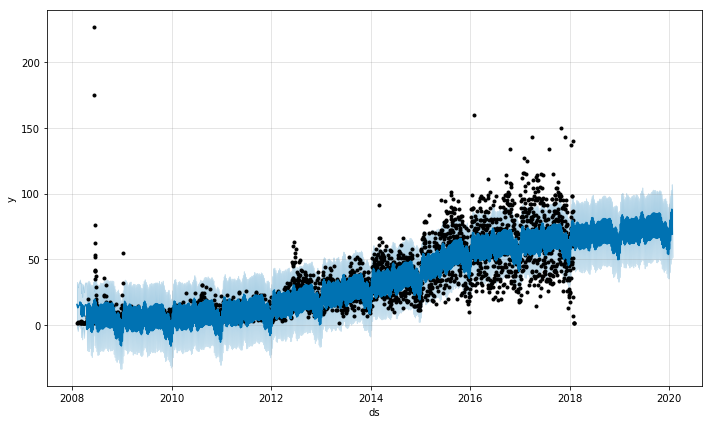

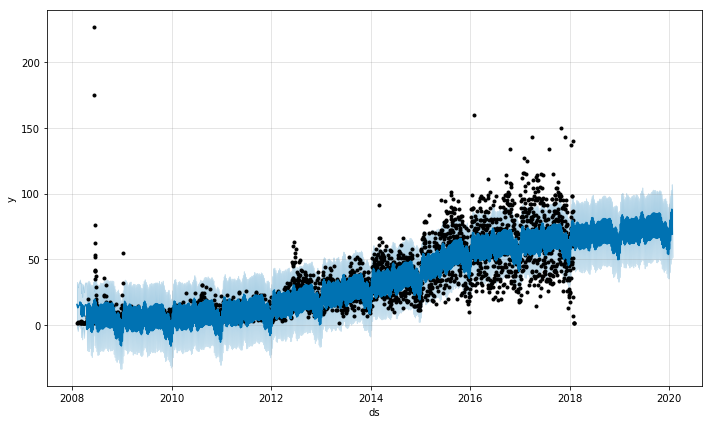

In [9]:
m.plot(forecast)

In [8]:
print(len(dados_count), len(forecast) )

3582 4302
